In [1]:
# Loading libraries
%matplotlib inline
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from pylab import plot, show, text
import datetime
import matplotlib.dates as mdates
import pylab

In [2]:
# load logins 
logins = pd.read_json('logins.json')


In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Convet logins to datetime

logins['login_time']= pd.to_datetime(logins.login_time, unit='m')

In [5]:
logins.set_index('login_time', inplace=True)

In [6]:
print(logins.index)

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)


In [7]:
login_count= logins.index.to_series().groupby(pd.Grouper(freq='15Min')).agg(['count']).rename(columns=dict(count='counts'))

In [8]:

# Resetting index
login_count = login_count.reset_index(drop=False)


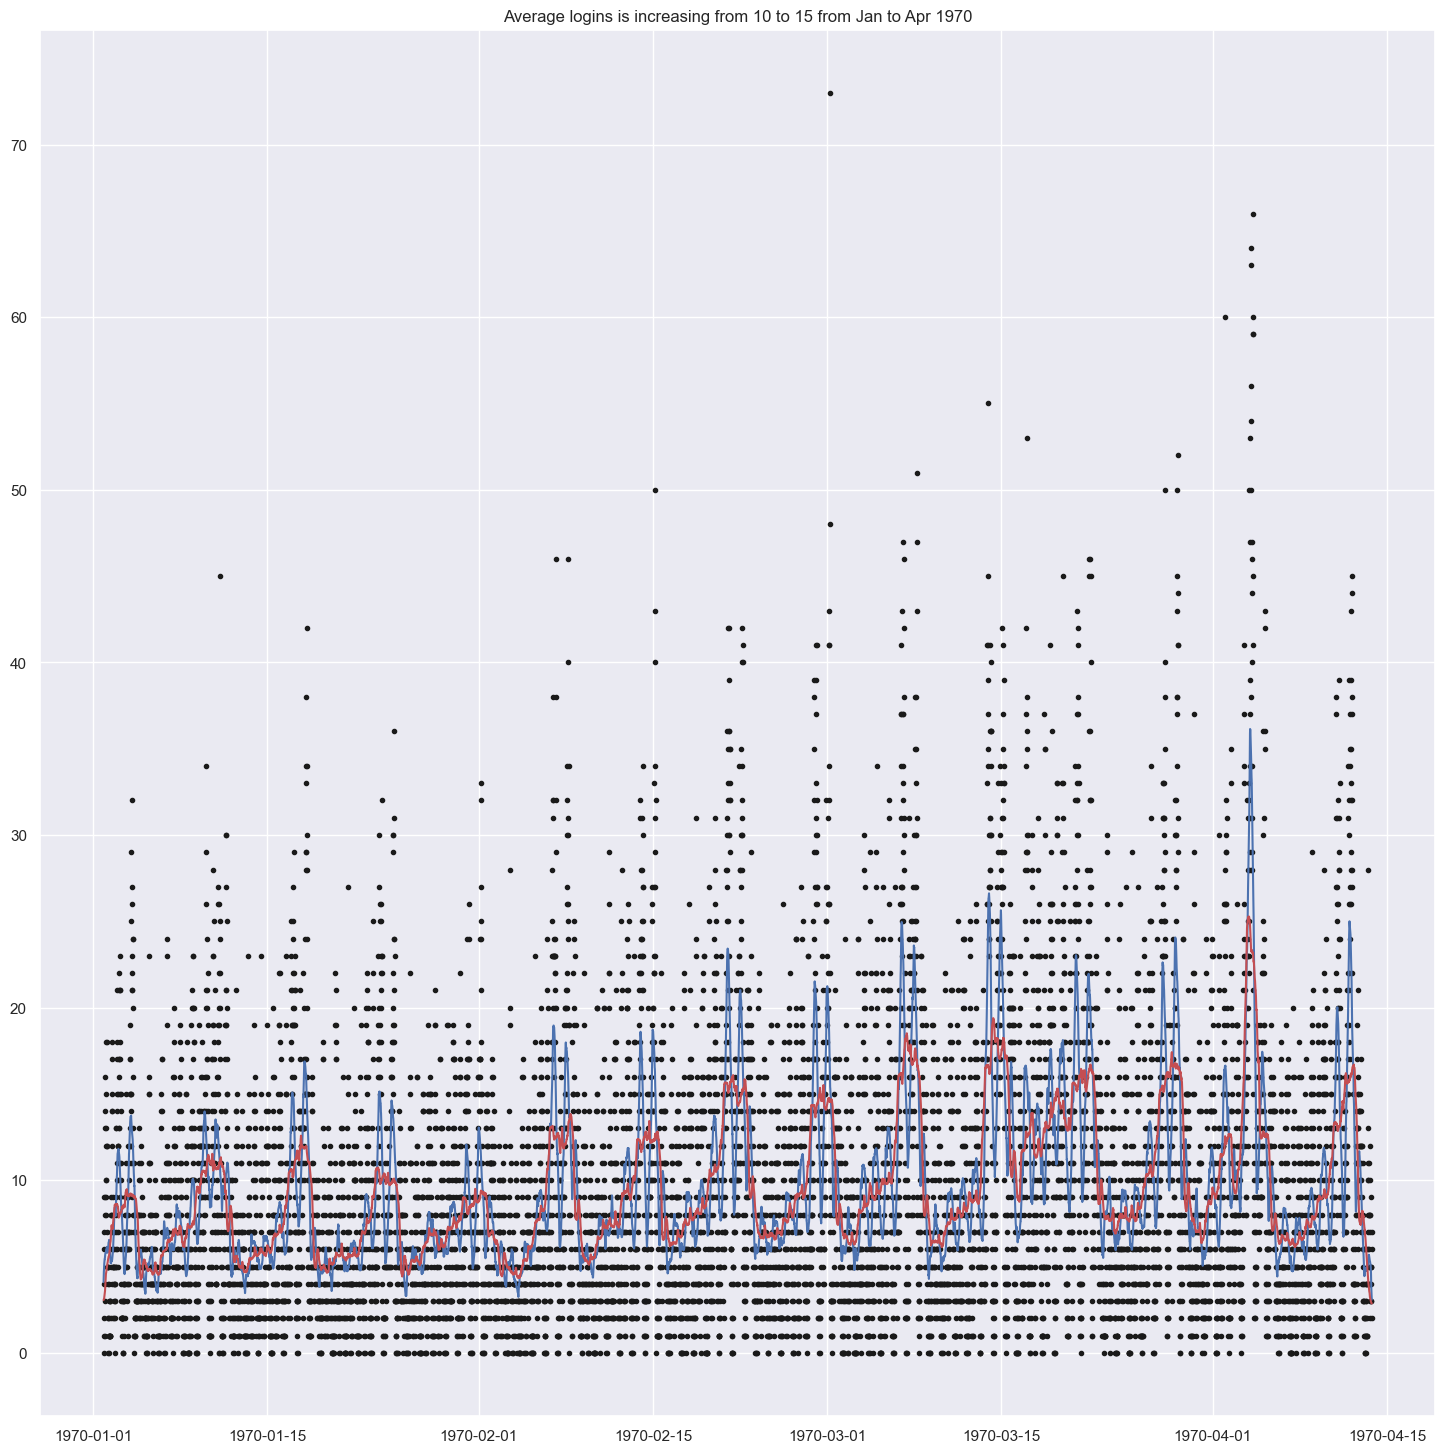

In [9]:
# do scatterplot and moving window average
def window_lag(size):
    return np.ones(size)/float(size)

# assign data
plt.figure(figsize=(18, 18))
timepart = login_count.login_time
height = login_count.counts
plot(timepart,height,'k.')
plot(timepart,np.convolve(height,window_lag(50),'same'),'b')
plot(timepart,np.convolve(height,window_lag(100),'same'),'r')
pylab.title('Average logins is increasing from 10 to 15 from Jan to Apr 1970')
show()

Based on moving average window of past 100 logins, there is an increase on the login from 10 to 15 logins from Jan to Apr 1970

C:\Users\sonia\AppData\Local\Temp\ipykernel_33728\508396255.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = login_count[login_count.loc[sort.index]['counts'] >= 50].reset_index(drop=True)
C:\Users\sonia\AppData\Local\Temp\ipykernel_33728\508396255.py:13: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  ax=sns.barplot(x="_time_", y="counts", data=df, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")


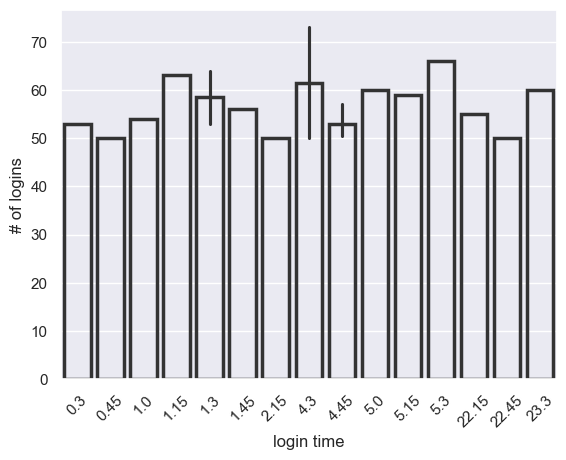

In [10]:
#sort data by counts in descending order
sort = login_count['counts'].sort_values(ascending=False)

#get only those times with 50 or more logins
df = login_count[login_count.loc[sort.index]['counts'] >= 50].reset_index(drop=True)
df['_time_']=df['login_time'].dt.strftime('%H:%M:%S') 
df = df.sort_values(by='_time_', ascending=True)

#format time into 2 decimal places like 4:30 -> 4.30
df['_time_']=df['_time_'].apply(lambda x: float(x.replace(':',''))/10000)

#draw bar chart 
ax=sns.barplot(x="_time_", y="counts", data=df, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
ax.set(ylabel='# of logins', xlabel='login time')
plt.xticks(rotation=45)

#show chart
plt.show()

Login peak hours is from 22:00 to 5:00
Max peak hours is from 4:00 to 6:00 AM with 50 to 73 logins

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment

Answer: Measure the gross income of transportation companies for both cities before and after implementing reimbursement of toll costs.
Compare confirm the the success of the experiment when there is significant increase in gross income after reimbursement of toll costs.

b. what statistical test(s) you will conduct to verify the significance of the observation

Answer: The paired samples t-test at a significance level of 0.05 can be used to statistically verify the significance of income increase observed from the experiment. It is paired observation because a measurement is taken before aand after an intervention.

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Answer: The hypothesis must be defined on the assumptions that, during the time of experiment, coditions such as seasonality and traffic conditions were the same in bothe cities. 
The null hypothesis is that the gross income of transportation companies for both cities remain the same after toll reimbursement. 
The alternative hypothesis is that the gross income of transportation companies for both cities is higher when toll is reimbursed than when toll was not reimbursed.
The t- statistic will be calculated using the by determining the sample mean of the differences, the standard deviation of the differences and the sample size.
The p-value of the resulting t-statistic will be calculated.
If this p-value is less than our significance level, α = 0.05, the null hypothesis will be rejected and it can be concluded that there is a significant increase in the gross income of transportation companies, operating in both cities after toll reimbursed compared to the gross income of non free toll era hence the success of the experiment.
However, if the p-value is more than the significance level,α = 0.05,the alternative hypothesis will be rejected and it will mean that the experiment failed.In this case other recommendations must be considered in solving this same problem. Passing out surveys to find out why drivers/ transportation companies do not like to operate in both cities but choose one over the other will be a good place to start.
The responses to the survey will help city managers design other experiments and check if these experiments can solve the problem.


Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [11]:
import json
#read and load json file
with open('ultimate_data_challenge.json') as f:
    ult_data = json.load(f) 
#convert to dataframe
usage = pd.DataFrame(ult_data)
backup = pd.DataFrame(ult_data)


In [12]:
usage.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
usage.shape

(50000, 12)

In [14]:
# Finding missing values
usage.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [15]:
lost_users = usage['avg_rating_of_driver'].isnull().sum()
lost= usage.shape[0]-lost_users 
retained = (lost / usage.shape[0])*100
print(f"Percentage of retained users: {retained}%")

Percentage of retained users: 83.756%


In [16]:
usage= usage.dropna()
usage.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [17]:
#convert string to datetime

usage['last_trip_date'] = pd.to_datetime(usage['last_trip_date'])
usage['signup_date']    = pd.to_datetime(usage['signup_date'])

In [18]:
# Determining active users

active= usage[usage['trips_in_first_30_days']>0]

In [19]:
active.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0


In [20]:
active.shape

(29921, 12)

In [21]:
#assign 1 if iPhone, 0 if not
usage['phone'] = usage['phone'].apply(lambda x: int(x == 'iPhone'))

In [22]:
#assign 1 if True, 0 if False
usage['ultimate_black_user'] = usage['ultimate_black_user'].apply(lambda x: int(x == True))

In [23]:
usage['active']= usage['trips_in_first_30_days']. apply(lambda x: int(x >0))

In [24]:
usage.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,0,11.8,0,82.4,3.13,4.9,1


In [25]:
drop_cols= usage.drop(columns='city')

Correlation between various features


<Axes: >

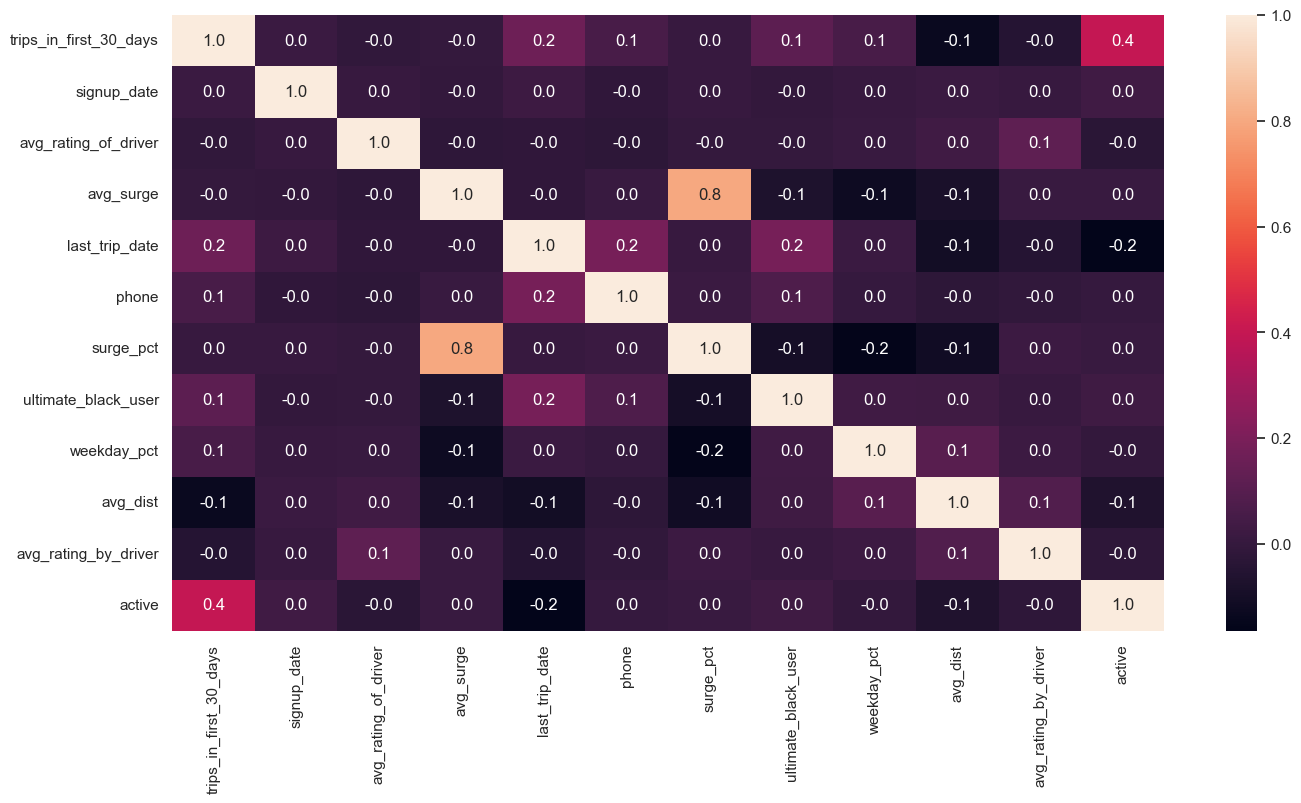

In [26]:
corr = drop_cols.corr()
plt.figure(figsize=(16,8))
print('Correlation between various features')
sns.heatmap(corr, annot=True, fmt=".1f")

2.Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.

Buiding a predictive model that determines whether or not a user will be active in their 6th month requires that a classification machine learning algorithms be used to build such a model. Examples of such models are, DecisionTree classifier, Random Forest model and logistic regression.

In [27]:
#loading libraries

import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

In [28]:
usage.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                              int64
surge_pct                        float64
ultimate_black_user                int64
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                             int64
dtype: object

In [29]:
usage[usage.select_dtypes(np.int64).columns] = usage.select_dtypes(np.int64).astype(np.int16)

In [30]:
usage[usage.select_dtypes(np.float64).columns] =usage.select_dtypes(np.float64).astype(np.float16)

In [31]:
usage['Number_of_hours_active']= usage.last_trip_date- usage.signup_date

In [32]:
# Converting number of days active to hours
usage['Number_of_hours_active'] = usage['Number_of_days_active'] / pd.Timedelta(hours=1)

KeyError: 'Number_of_days_active'

In [ ]:
usage.head()

In [ ]:
usage.Number_of_days_active.dtypes

In [ ]:
usage.isnull().sum()

In [ ]:
# Defining X and y

X = usage[['avg_dist', 'avg_rating_by_driver','Number_of_days_active', 'avg_rating_of_driver','avg_surge','phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct']]
y = (usage.active == 1)

To prevent data leakage trips in first 30 days feature was deleted beacuse that feature was used to predict active users.

In [ ]:
# Splitting data into train and test sets in the ratio 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Defining RF model

RF= RandomForestClassifier(n_estimators = 8)

In [ ]:
RF_MODEL= RF.fit(X_train,y_train)

In [ ]:
y_pred = RF_MODEL.predict(X_test)
y_pred_prob = RF_MODEL.predict_proba(X_test)


# Assessing RF model

ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

In [ ]:
# Feature Importance
importances_df = pd.DataFrame({"feature_names" : RF_MODEL.feature_names_in_, 
                               "importances" : RF_MODEL.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(12, 4))
g = sns.barplot(x=importances_df["feature_names"][:19], 
                y=importances_df["importances"][:19])
plt.xticks(rotation=90)
g.set_title("Feature importances", fontsize=14);

In [ ]:
# Determining the Area under the curve.

y_score = RF_MODEL.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label= 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print("Accuracy score: ", accuracy_score(clf.predict(X_test), y_test))


In [ ]:
clf.fit(X_train / np.std(X_train, 0), y_train)
print("Regression coefficients: ", clf.coef_)
print("Column names: ", (X.columns.values))


Accuracy of Random Forest Model = 0.78
important features include= number of hours active,avg_dist,weekday_pct

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

From the most important features list, the most important is the number of hours active and the avg_distance. Which means the first 30 days are crucial to user retention. Discounts and promotions can be given after the first 30 days of sign up.
More advertisements and perks to encourage weekday rides
Drivers must also be encourage to riders are comfortable duribg rides so as to improve avg rating by riders. Riders who attain high ratings must be can be given fuel coupons and other car servicing discounts.
